In [1]:
import pickle 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import re

import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import copy
import urllib

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import pylab
import matplotlib.patches as mpatches

[nltk_data] Downloading package punkt to
[nltk_data]     /home/cabaretmina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# I - Data imports 

In [2]:
data = pickle.load(open("/home/cabaretmina/Documents/Stage/BIOS.pkl" ,'rb'))
print("data = ", len(data))

data =  388862


In [3]:
#Recovery of only the nurse and surgeon
data_np = []

for i in range(len(data)):
    if data[i]["title"] == 'nurse':
        data_np.append(data[i])
    elif data[i]["title"] == 'surgeon':
        data_np.append(data[i])
    
print("data_np = ", len(data_np))

data_np =  32186


In [4]:
X_np = ['' for i in range(len(data_np))] 
Titles_np = ['' for i in range(len(data_np))] 
Gen_np = ['' for i in range(len(data_np))] 

for i in range(len(data_np)):
    X_np[i] = data_np[i]["raw"][data_np[i]["start_pos"]:]
    Titles_np[i] = data_np[i]["title"]
    Gen_np[i] = data_np[i]["gender"]

In [5]:
#example
print("premier terme de..")
print("X_np: " , X_np[0])
print("Titles_np: ", Titles_np[0])
print("Gen_np: ", Gen_np[0])

premier terme de..
X_np:   For more quips and tips, refer to her blog, “The Written Remedy” (thewrittenremedy@blogspot.com). Abby can be reached at amackrn23@gmail.com or on Twitter at @AbigailMackey RN.
Titles_np:  nurse
Gen_np:  F


# II - Data visualization

Text(0.5, 1.0, 'Number of biographies per title')

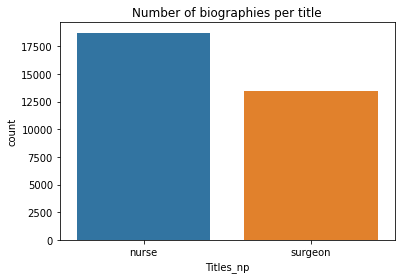

In [6]:
data_visu = pd.DataFrame(Titles_np, columns= ['Titles_np'])
data_visu["Gen_np"] = Gen_np

sns.countplot(x="Titles_np", data=data_visu).set_title('Number of biographies per title')

Text(0.5, 1.0, 'Male/Female repartition in the whole dataset')

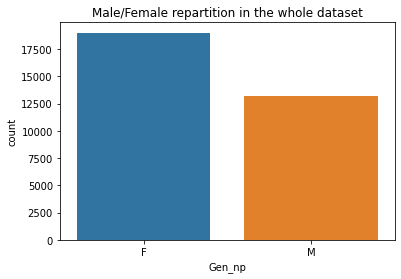

In [7]:
sns.countplot(x="Gen_np", data=data_visu).set_title('Male/Female repartition in the whole dataset')

<AxesSubplot:xlabel='Titles_np', ylabel='count'>

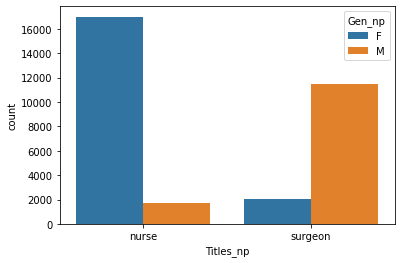

In [8]:
sns.countplot(x="Titles_np", hue="Gen_np", data=data_visu)

Text(0.5, 1.0, 'gender - occupation')

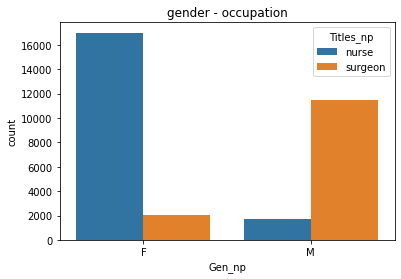

In [9]:
sns.countplot(x="Gen_np", hue="Titles_np", data=data_visu).set_title('gender - occupation')

# III - Gender modification

We will build two datasets, one with no gender information and one with reverse gender information.

In [10]:
def remove_uppercase_punctuation(X):
    X_lower_p = []
    for i in range(len(X)):
        Xi = X[i].lower()
        Xi_p = re.sub('\@|\?|\.|\!|\,|\/|\;|\:|\(|\)|\[|\]|\”|\“', '', Xi)
        X_lower_p = X_lower_p + [Xi_p]
    return(X_lower_p)          

In [11]:
def tokenize(X_raw): 
    X_tok = []
    for i in range(len(X_raw)):
        X_tok = X_tok + [word_tokenize(X_raw[i])]   
    return X_tok

def untokenize(X_tok): 
    l = len(X_tok)
    X_raw = ['' for c in range(l)]
    for i in range(l):
        li = len(X_tok[i])
        for j in range(li):
            X_raw[i] = X_raw[i] + ' ' + X_tok[i][j]
    return X_raw

We are now going to build a dataset without gender information.

remove_gender_info() deletes each and every gendered word belonging to a predefined corpus of word.

In [12]:
def remove_gender_info(X_tok, list_names):
    #first names and explicit gender indicators
    X_tok_nogen = copy.deepcopy(X_tok)
    gen = ['he', 'she', 'her', 'his', 'him', 'hers', 'himself', 'herself', 'mr', 'mrs', 'ms', 'mr.', 'mrs.', 'ms.', 'miss']
    lx = len(X_tok_nogen)
    for i in range(lx):
        lxi = len(X_tok_nogen[i])
        j=0
        while j<lxi:
            if (X_tok_nogen[i][j] in gen) or (X_tok_nogen[i][j] in list_names):
                del X_tok_nogen[i][j]
                lxi-=1
                j-=1
            j+=1
    return X_tok_nogen


#create list of 18239 most common first names
response = urllib.request.urlopen('https://www.usna.edu/Users/cs/roche/courses/s15si335/proj1/files.php%3Ff=names.txt&downloadcode=yes')
lines = response.readlines()
list_names = []
for line in lines:
    name = line.decode()
    name = name[:-1]
    list_names.append(name.lower())
    

In [13]:
X_np = remove_uppercase_punctuation(X_np)
X_tok_np = tokenize(X_np)

#Remove gender
X_tok_nogen_np = remove_gender_info(X_tok_np, list_names)
X_nogen_np = untokenize(X_tok_nogen_np)

In [14]:
print(X_np[0])
print(X_nogen_np[0])
print("")
print(X_tok_np[0])
print(X_tok_nogen_np[0])

 for more quips and tips refer to her blog the written remedy thewrittenremedyblogspotcom abby can be reached at amackrn23gmailcom or on twitter at abigailmackey rn
 for more quips and tips refer to blog the written remedy thewrittenremedyblogspotcom be reached at amackrn23gmailcom or on twitter at abigailmackey rn

['for', 'more', 'quips', 'and', 'tips', 'refer', 'to', 'her', 'blog', 'the', 'written', 'remedy', 'thewrittenremedyblogspotcom', 'abby', 'can', 'be', 'reached', 'at', 'amackrn23gmailcom', 'or', 'on', 'twitter', 'at', 'abigailmackey', 'rn']
['for', 'more', 'quips', 'and', 'tips', 'refer', 'to', 'blog', 'the', 'written', 'remedy', 'thewrittenremedyblogspotcom', 'be', 'reached', 'at', 'amackrn23gmailcom', 'or', 'on', 'twitter', 'at', 'abigailmackey', 'rn']


# IV - Language encoding

BOW: https://www.mygreatlearning.com/blog/bag-of-words/

## Bag of words 

We make a version of bag of words taking only the n most common words in the dataset. We do this because otherwise the bow is too big.

In [15]:
def create_dico(X_tok, l_too_common = []):
    dico = {}
    for i in range(len(X_tok)):
        for token in X_tok[i]:
            if not(token in l_too_common):
                if token in dico:
                    dico[token] += 1
                else:
                    dico[token] = 1
    return(dico)

In [16]:
def most_common_token(dico, n):
    l_values = list(dico.values())
    l_values.sort(reverse=True)
    col_names = [k for (k,v) in dico.items() if v >= l_values[n]]
    return(col_names)

In [17]:
def bag_of_words_reduce(X_tok, col_names):
    n_row = len(X_tok)
    n_col = len(col_names)
    X_bw = np.zeros((n_row,n_col), dtype=int)
    for i in range(n_row):
        for k in range(n_col):
            for j in range(len(X_tok[i])):
                if X_tok[i][j] == col_names[k]:
                    X_bw[i][k] += 1
    X_bw = pd.DataFrame(X_bw, columns = col_names)
    return(X_bw)

In [19]:
#with gender indicators
dico_X = create_dico(X_tok_np)
col_names_X = most_common_token(dico_X, 100)

X_bw_np = bag_of_words_reduce(X_tok_np, col_names_X)

#without gender indicators 
dico_X_nogen = create_dico(X_tok_nogen_np)
col_names_X_nogen = most_common_token(dico_X_nogen, 100)

X_bw_nogen_np = bag_of_words_reduce(X_tok_nogen_np, col_names_X_nogen)

# V - Title prediction - logistic regression 

## Feature importance

In [20]:
def feature_importance_logreg(model, X, chosendataset, n_features=20):
    feature_importance = abs(model.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[-n_features:]
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure()
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance for dataset ' + chosendataset)

    plt.tight_layout() 
    if chosendataset == "with gender indicators":
        plt.savefig("feature_imp_gi.pdf", format = "pdf")
    else:
        plt.savefig("feature_imp_nogi.pdf", format = "pdf")
    plt.show()

## Bag of word encoding

Split : train/test

In [74]:
X_bw_train_np, X_bw_test_np, X_bw_nogen_train_np, X_bw_nogen_test_np, Titles_train_np, Titles_test_np, Gen_train_np, Gen_test_np = train_test_split(X_bw_np, X_bw_nogen_np, Titles_np, Gen_np, test_size = 0.4, random_state=0)
print(len(X_bw_train_np))

19311


Save the data

In [ ]:
#pickle.dump(X_bw_np, open("X_bw_np_32186","wb"))"
#pickle.dump(X_bw_nogen_np, open("X_bw_nogen_np_32186","wb"))
#pickle.dump(Titles_np, open("Titles_np_32186","wb"))
#pickle.dump(Gen_np, open("Gen_np_32186","wb"))

### With gender information

In [54]:
#Creation of the model
model_title_BOW1 = LogisticRegression(penalty='l2', solver = 'lbfgs',max_iter=1000)

#Model training
model_title_BOW1.fit(X_bw_train_np, Titles_train_np)

LogisticRegression(max_iter=1000)

In [55]:
#Model prediction
preds_BOW1 = model_title_BOW1.predict(X_bw_test_np)

#### Feature importance

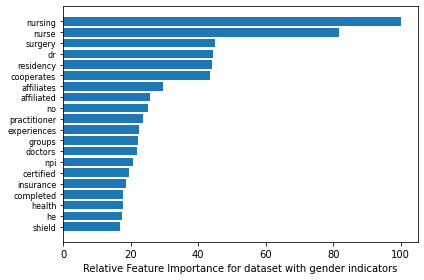

In [56]:
feature_importance_logreg(model_title_BOW1, X_bw_test_np, "with gender indicators", n_features=20)
#plt.savefig("feature_imp_gi.pdf", format = "pdf")

Accuracy :

In [76]:
print('Accuracy of classifier with gender informations on Title prediction:', accuracy_score(Titles_test_np, preds_BOW1))

from sklearn.model_selection import cross_val_score, LeaveOneOut
scores = cross_val_score(model_title_BOW1,  X_bw_np, Titles_np, cv=5)
print("Accuracy (cross validation method) :",scores)

Accuracy of classifier with gender informations on Title prediction: 0.9645825242718447
Accuracy (cross validation method) : [0.94951848 0.97576511 0.97250272 0.95354979 0.9583657 ]


Dataframe :

In [58]:
data_visu_BOW1 = pd.DataFrame(Titles_test_np, columns= ['Titles_test_np']) 
data_visu_BOW1["Predic"] = preds_BOW1
data_visu_BOW1["Gen"] = Gen_test_np
print(data_visu_BOW1)

      Titles_test_np   Predic Gen
0            surgeon    nurse   F
1              nurse    nurse   F
2            surgeon  surgeon   M
3              nurse    nurse   F
4            surgeon  surgeon   M
...              ...      ...  ..
12870          nurse    nurse   F
12871        surgeon  surgeon   M
12872        surgeon  surgeon   M
12873          nurse    nurse   F
12874        surgeon  surgeon   M

[12875 rows x 3 columns]
0.9645825242718447


In [77]:
def T_(data_visu_BOW1):
        T=[]
        #Postif==nurse et négatif==surgeon
        for i in range(len(data_visu_BOW1)):
            if data_visu_BOW1['Predic'][i]==data_visu_BOW1['Titles_test_np'][i] and data_visu_BOW1['Predic'][i]=="nurse":
                T.append("TP")
            elif data_visu_BOW1['Predic'][i]==data_visu_BOW1['Titles_test_np'][i] and data_visu_BOW1['Predic'][i]=="surgeon":
                T.append("TN")
            elif data_visu_BOW1['Predic'][i]!=data_visu_BOW1['Titles_test_np'][i] and data_visu_BOW1['Predic'][i]=="surgeon":
                T.append("FN")
            else :
                T.append("FP")

        data_visu_BOW1["T"]=T 

In [85]:
T_(data_visu_BOW1)

confusion_matrix = pd.crosstab(data_visu_BOW1['Titles_test_np'], data_visu_BOW1['Predic'], rownames=['Actual'], colnames=['Predicted'])
print ("Confusion matrix :\n",confusion_matrix,"\n")
print("TP:", len(data_visu_BOW1[data_visu_BOW1["T"]=="TP"]),"\nTN:",len(data_visu_BOW1[data_visu_BOW1["T"]=="TN"]),"\nFN:", len(data_visu_BOW1[data_visu_BOW1["T"]=="FN"]),"\nFP:", len(data_visu_BOW1[data_visu_BOW1["T"]=="FP"]))
def confusion_matrix(data_visu, genre):
    idx=data_visu[data_visu["Gen"]==genre].index
    data_visu_M=data_visu.drop(idx)
    confusion_matrix = pd.crosstab(data_visu_M['Titles_test_np'], data_visu_M['Predic'], rownames=['Actual'], colnames=['Predicted'])
    return confusion_matrix,data_visu_M

#1 M
confusion_mtrx,data_visu_BOW1_M=confusion_matrix(data_visu_BOW1, "F")
print ("\nConfusion matrix Men:\n",confusion_mtrx,"\n")
print("TP:", len(data_visu_BOW1_M[data_visu_BOW1_M["T"]=="TP"]),"\nTN:",len(data_visu_BOW1_M[data_visu_BOW1_M["T"]=="TN"]),"\nFN:", len(data_visu_BOW1_M[data_visu_BOW1_M["T"]=="FN"]),"\nFP:", len(data_visu_BOW1_M[data_visu_BOW1_M["T"]=="FP"]))

#1 F
confusion_mtrx,data_visu_BOW1_F=confusion_matrix(data_visu_BOW1, "M")
print ("\nConfusion matrix Women:\n",confusion_mtrx,"\n")
print("TP:", len(data_visu_BOW1_F[data_visu_BOW1_F["T"]=="TP"]),"\nTN:",len(data_visu_BOW1_F[data_visu_BOW1_F["T"]=="TN"]),"\nFN:", len(data_visu_BOW1_F[data_visu_BOW1_F["T"]=="FN"]),"\nFP:", len(data_visu_BOW1_F[data_visu_BOW1_F["T"]=="FP"]))


Confusion matrix :
 Predicted  nurse  surgeon
Actual                   
nurse       7286      190
surgeon      266     5133 

TP: 7286 
TN: 5133 
FN: 190 
FP: 266

Confusion matrix Men:
 Predicted  nurse  surgeon
Actual                   
nurse        529      129
surgeon      104     4503 

TP: 529 
TN: 4503 
FN: 129 
FP: 104

Confusion matrix Women:
 Predicted  nurse  surgeon
Actual                   
nurse       6757       61
surgeon      162      630 

TP: 6757 
TN: 630 
FN: 61 
FP: 162


### Without gender information

In [60]:
#Creation of the model
model_title_BOW2 = LogisticRegression(penalty='l2', solver = 'lbfgs',max_iter=1000)

#Model training
model_title_BOW2.fit(X_bw_nogen_train_np, Titles_train_np)

LogisticRegression(max_iter=1000)

In [61]:
#Model prediction
preds_BOW2 = model_title_BOW2.predict(X_bw_nogen_test_np)

Feature importance

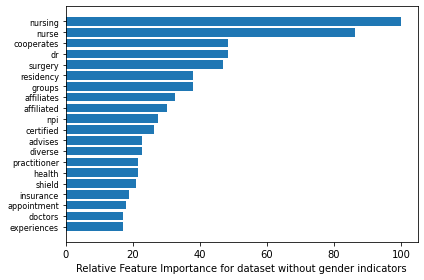

In [62]:
feature_importance_logreg(model_title_BOW2, X_bw_nogen_test_np, "without gender indicators", n_features=20)
#plt.savefig("feature_imp_nogi.pdf", format = "pdf")

Accuracy :

In [63]:
print('Accuracy of classifier without gender informations on Title prediction:', accuracy_score(Titles_test_np, preds_BOW2))

from sklearn.model_selection import cross_val_score, LeaveOneOut
scores = cross_val_score(model_title_BOW2,  X_bw_nogen_np, Titles_np, cv=5)
print("Accuracy (cross validation method) :",scores)

Accuracy of classifier without gender informations on Title prediction: 0.9392621359223301
Accuracy (cross validation method) : [0.91332712 0.95323909 0.94982135 0.9044586  0.92729532]


In [69]:
data_visu_BOW2 = pd.DataFrame(Titles_test_np, columns= ['Titles_test_np']) 
data_visu_BOW2["Predic"] = preds_BOW2 de la colonne 
data_visu_BOW2["Gen"]=Gen_test_np
print(accuracy_score(Titles_test_np, preds_BOW2)) 

0.9392621359223301


In [87]:
T_(data_visu_BOW2)

#all
confusion_matrix_ = pd.crosstab(data_visu_BOW2['Titles_test_np'], data_visu_BOW2['Predic'], rownames=['Actual'], colnames=['Predicted'])
print ("confusion_matrix :\n",confusion_matrix_,"\n")
print("TP:", len(data_visu_BOW2[data_visu_BOW2["T"]=="TP"]),"\nTN:",len(data_visu_BOW2[data_visu_BOW2["T"]=="TN"]),"\nFN:", len(data_visu_BOW2[data_visu_BOW2["T"]=="FN"]),"\nFP:", len(data_visu_BOW2[data_visu_BOW2["T"]=="FP"]))

# M
confusion_mtrx,data_visu_BOW2_M=confusion_matrix(data_visu_BOW2, "F")
print ("\nConfusion matrix Men:\n",confusion_mtrx,"\n")
print("TP:", len(data_visu_BOW2_M[data_visu_BOW2_M["T"]=="TP"]),"\nTN:",len(data_visu_BOW2_M[data_visu_BOW2_M["T"]=="TN"]),"\nFN:", len(data_visu_BOW2_M[data_visu_BOW2_M["T"]=="FN"]),"\nFP:", len(data_visu_BOW2_M[data_visu_BOW2_M["T"]=="FP"]))

# F
confusion_mtrx,data_visu_BOW2_F=confusion_matrix(data_visu_BOW2, "M")
print ("\nConfusion matrix Woman:\n",confusion_mtrx,"\n")
print("TP:", len(data_visu_BOW2_F[data_visu_BOW2_F["T"]=="TP"]),"\nTN:",len(data_visu_BOW2_F[data_visu_BOW2_F["T"]=="TN"]),"\nFN:", len(data_visu_BOW2_F[data_visu_BOW2_F["T"]=="FN"]),"\nFP:", len(data_visu_BOW2_F[data_visu_BOW2_F["T"]=="FP"]))

confusion_matrix :
 Predicted  nurse  surgeon
Actual                   
nurse       7149      327
surgeon      455     4944 

TP: 7149 
TN: 4944 
FN: 327 
FP: 455

Confusion matrix Men:
 Predicted  nurse  surgeon
Actual                   
nurse        617       41
surgeon      366     4241 

TP: 617 
TN: 4241 
FN: 41 
FP: 366

Confusion matrix Woman:
 Predicted  nurse  surgeon
Actual                   
nurse       6532      286
surgeon       89      703 

TP: 6532 
TN: 703 
FN: 286 
FP: 89
